In [ ]:
import pandas as pd

# Load the data into a Pandas dataframe
df = pd.read_csv('/content/cyber breaches dataset.csv')


**META DATA TABLE**

In [ ]:
import pandas as pd

# Define the metadata table
metadata = pd.DataFrame({
    'Attribute': ['Entity', 'Year', 'Records', 'Organization type', 'Method'],
    'Description': ['The name of the organization that experienced the breach', 
                    'The year in which the breach occurred', 
                    'The number of records that were compromised during the breach', 
                    'The type of organization that experienced the breach', 
                    'The Method used to breach the data'],
    'Data Type': ['string', 'integer', 'integer', 'string', 'string']
})

# Apply CSS styles to the metadata table
styled_table = metadata.style.set_table_styles([    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]},
]).set_caption("<b><font color='black'>Metadata of each attribute</font></b>")

# Display the styled metadata table
display(styled_table)


,Attribute,Description,Data Type
0,Entity,The name of the organization that experienced the breach,string
1,Year,The year in which the breach occurred,integer
2,Records,The number of records that were compromised during the breach,integer
3,Organization type,The type of organization that experienced the breach,string
4,Method,The Method used to breach the data,string


**ERROR DISCRIPTION**

In [ ]:
# Define the expected data types
expected_data_types = {
    'Entity': str,
    'Year': int,
    'Records': int,
    'Organization type': str,
    'Method': str
}

# Initialize the output dataframe with column names
output_columns = ['ATTRIBUTE', 'EXPECTED DATA TYPE', 'ACTUAL DATA TYPE', 'MISSING DATA ROWS']
output_df = pd.DataFrame(columns=output_columns)

# Iterate through each attribute and describe missing or error data
for attribute, dtype in expected_data_types.items():
    # Expected data type
    expected_dtype = str(dtype).split("'")[1]

    # Actual data type
    actual_dtype = str(df[attribute].dtype)

    # Check for missing data
    missing_rows = df[df[attribute].isnull()].index.tolist()

    # Add row to output dataframe
    output_df = output_df.append({'ATTRIBUTE': attribute, 'EXPECTED DATA TYPE': expected_dtype, 'ACTUAL DATA TYPE': actual_dtype, 
                                  'MISSING DATA ROWS': missing_rows}, ignore_index=True)

# Apply CSS styles to the dataframe
styled_table = output_df.style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("<b><font color='black'> DATA ERROR TABLE</font></b>")

# Display the styled table
display(styled_table)


<ipython-input-15-e792ab81a359>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'ATTRIBUTE': attribute, 'EXPECTED DATA TYPE': expected_dtype, 'ACTUAL DATA TYPE': actual_dtype,
<ipython-input-15-e792ab81a359>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'ATTRIBUTE': attribute, 'EXPECTED DATA TYPE': expected_dtype, 'ACTUAL DATA TYPE': actual_dtype,
<ipython-input-15-e792ab81a359>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'ATTRIBUTE': attribute, 'EXPECTED DATA TYPE': expected_dtype, 'ACTUAL DATA TYPE': actual_dtype,
<ipython-input-15-e792ab81a359>:26: FutureWarning: The frame.append method is deprecated and will be removed 

,ATTRIBUTE,EXPECTED DATA TYPE,ACTUAL DATA TYPE,MISSING DATA ROWS
0,Entity,str,object,[]
1,Year,int,object,[]
2,Records,int,object,"[40, 337]"
3,Organization type,str,object,[]
4,Method,str,object,[83]


***DATA CLEANING***

In [ ]:

# Define the columns to check for missing values
cols_to_check = ['Entity', 'Year', 'Records', 'Organization type', 'Method']

# Remove the rows with missing values in the specified columns
cleaned_df = df.dropna(subset=cols_to_check)

# Save the cleaned data into a new CSV file
cleaned_df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


In [ ]:
df = pd.read_csv('/content/cyber breaches dataset.csv')


**Data Transforming**

In [ ]:
import pandas as pd


# Create a new column to store the ordinal numbers
df['Method_Ordinal'] = ''

# Create a dictionary to store the ordinal numbers
ordinal_numbers = {}

# Iterate over the "Method" column
for index, method in enumerate(df['Method']):
    if method not in ordinal_numbers:
        ordinal_numbers[method] = len(ordinal_numbers) + 1
    # Store the corresponding ordinal number in the new column
    df.at[index, 'Method_Ordinal'] = ordinal_numbers[method]

# Create the styled table with CSS styling
styled_table = df[['Method_Ordinal', 'Method']].head(20).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption("")

# Display the styled table
display(styled_table)


,Method_Ordinal,Method
0,1,hacked
1,1,hacked
2,2,poor security
3,1,hacked
4,2,poor security
5,3,lost
6,1,hacked
7,3,lost
8,2,poor security
9,1,hacked


In [ ]:
import pandas as pd

# Read the CSV file

# Create a new column 'Organization_Type_Ordinal' based on occurrence
df['Organization_Type_Ordinal'] = df['Organization type'].astype('category').cat.codes

# Define the CSS styles for the table
styled_table = df[['Organization type', 'Organization_Type_Ordinal']].head(20).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption("")

# Display the styled table
display(styled_table)


,Organization type,Organization_Type_Ordinal
0,healthcare,21
1,social networking,42
2,healthcare,21
3,tech,44
4,tech,44
5,healthcare,21
6,advertising,6
7,healthcare,21
8,telecommunications,46
9,transport,49


In [ ]:
import pandas as pd

# Read the CSV data

# Create a new column 'Entity_Ordinal' based on occurrence
df['Entity_Ordinal'] = df['Entity'].rank(method='dense').astype(int)

# Select the first 20 rows of the transformed data along with the original data
styled_table = df[['Entity', 'Entity_Ordinal']].head(20).T.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption("")

# Display the styled table
display(styled_table)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Entity,21st Century Oncology,500px,Accendo Insurance Co.,Adobe Systems Incorporated,Adobe Inc.,Advocate Medical Group,AerServ (subsidiary of InMobi),"Affinity Health Plan, Inc.",Airtel,Air Canada,TD Ameritrade,Ancestry.com,Animal Jam,"Ankle & Foot Center of Tampa Bay, Inc.",Anthem Inc.,AOL,AOL,AOL,Apple,Apple Health Medicaid
Entity_Ordinal,2,4,7,9,8,10,11,12,14,13,211,15,16,17,18,5,5,5,19,20


**DATA ANLYSIS**

In [ ]:
import pandas as pd

# Select the columns of interest
columns_of_interest = ['Organization_Type_Ordinal', 'Method_Ordinal', 'Entity_Ordinal', 'Records']
df_selected = df[columns_of_interest]

# Calculate summary statistics
summary = pd.DataFrame({
    'Variable': df_selected.columns,
    'Sum': df_selected.sum(),
    'Mean': df_selected.mean(),
    'Std Dev': df_selected.std(),
    'Skewness': df_selected.skew(),
    'Kurtosis': df_selected.kurtosis()
}, columns=['Variable', 'Sum', 'Mean', 'Std Dev', 'Skewness', 'Kurtosis'])

# Apply CSS style to the summary table
styled_table = summary.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption("<b><font color='black'>SUMMARY STATISTICS</font></b>")

# Display the styled table
display(styled_table)


,Variable,Sum,Mean,Std Dev,Skewness,Kurtosis
Organization_Type_Ordinal,Organization_Type_Ordinal,8545,29.064626,15.437618,0.156303,-1.403523
Method_Ordinal,Method_Ordinal,693,2.357143,2.591335,3.724019,15.930654
Entity_Ordinal,Entity_Ordinal,40113,136.438776,80.469959,0.036305,-1.211599
Records,Records,13244961816,45050890.530612,196455513.909194,12.178303,176.897378


**CORRELATION**

The correlation between Records and Method_Ordinal is negative correlation.


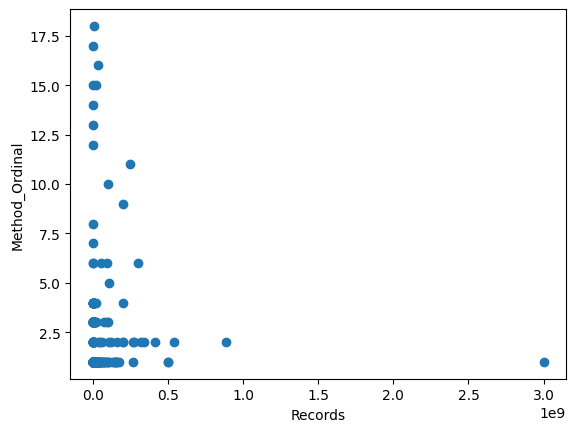

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'Records' and 'Method_Ordinal'

# Filter non-float rows
float_mask = pd.to_numeric(df['Records'], errors='coerce').notnull() & pd.to_numeric(df['Method_Ordinal'], errors='coerce').notnull()
Records = df['Records'][float_mask]
Method_Ordinal = df['Method_Ordinal'][float_mask]

# Calculate correlation coefficient
correlation = np.corrcoef(Records.astype(float), Method_Ordinal.astype(float))[0, 1]

# Plot the data
plt.scatter(Records, Method_Ordinal)
plt.xlabel('Records')
plt.ylabel('Method_Ordinal')

# Determine the correlation type
if correlation > 0:
    correlation_type = 'positive'
elif correlation < 0:
    correlation_type = 'negative'
else:
    correlation_type = 'no'

# Print the correlation type
print(f"The correlation between Records and Method_Ordinal is {correlation_type} correlation.")

# Display the plot
plt.show()


The correlation between Records and Method_Ordinal is positive correlation.


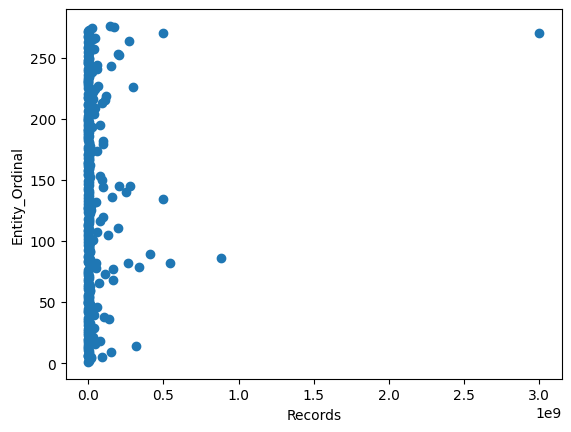

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'Records' and 'Method_Ordinal'

# Filter non-float rows
float_mask = pd.to_numeric(df['Records'], errors='coerce').notnull() & pd.to_numeric(df['Entity_Ordinal'], errors='coerce').notnull()
Records = df['Records'][float_mask]
Entity_Ordinal = df['Entity_Ordinal'][float_mask]

# Calculate correlation coefficient
correlation = np.corrcoef(Records.astype(float), Entity_Ordinal.astype(float))[0, 1]

# Plot the data
plt.scatter(Records, Entity_Ordinal)
plt.xlabel('Records')
plt.ylabel('Entity_Ordinal')

# Determine the correlation type
if correlation > 0:
    correlation_type = 'positive'
elif correlation < 0:
    correlation_type = 'negative'
else:
    correlation_type = 'no'

# Print the correlation type
print(f"The correlation between Records and Method_Ordinal is {correlation_type} correlation.")

# Display the plot
plt.show()


**GRAPH BY METHODS**

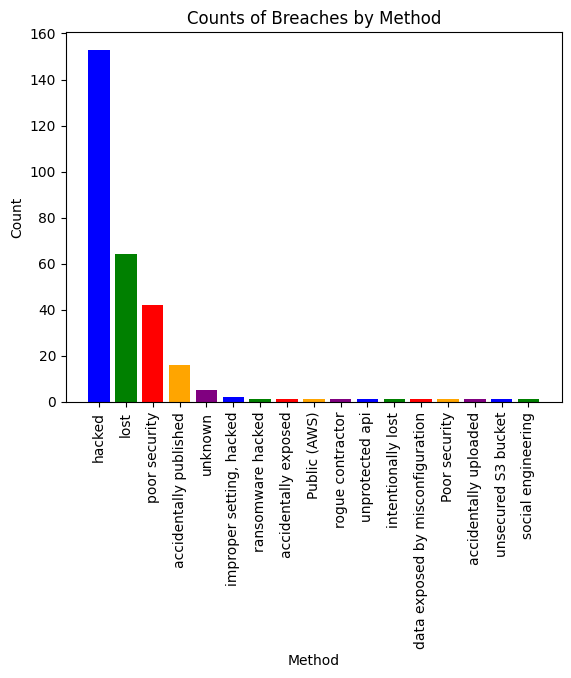

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file

# Replace all rows that contain 'publicly accessible Amazon Web Services (AWS) server' with 'Public (AWS)'
df['Method'] = df['Method'].str.replace('publicly accessible Amazon Web Services \(AWS\) server', 'Public (AWS)', case=False, regex=True)

# Count the number of occurrences of each breach method
method_counts = df['Method'].value_counts()

# Define colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Create a bar chart of the breach method counts with vertical labels
fig, ax = plt.subplots()
ax.bar(method_counts.index, method_counts.values, color=colors)
ax.set_title('Counts of Breaches by Method')
ax.set_xlabel('Method')
ax.set_ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


<ipython-input-60-f7a58bb23168>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


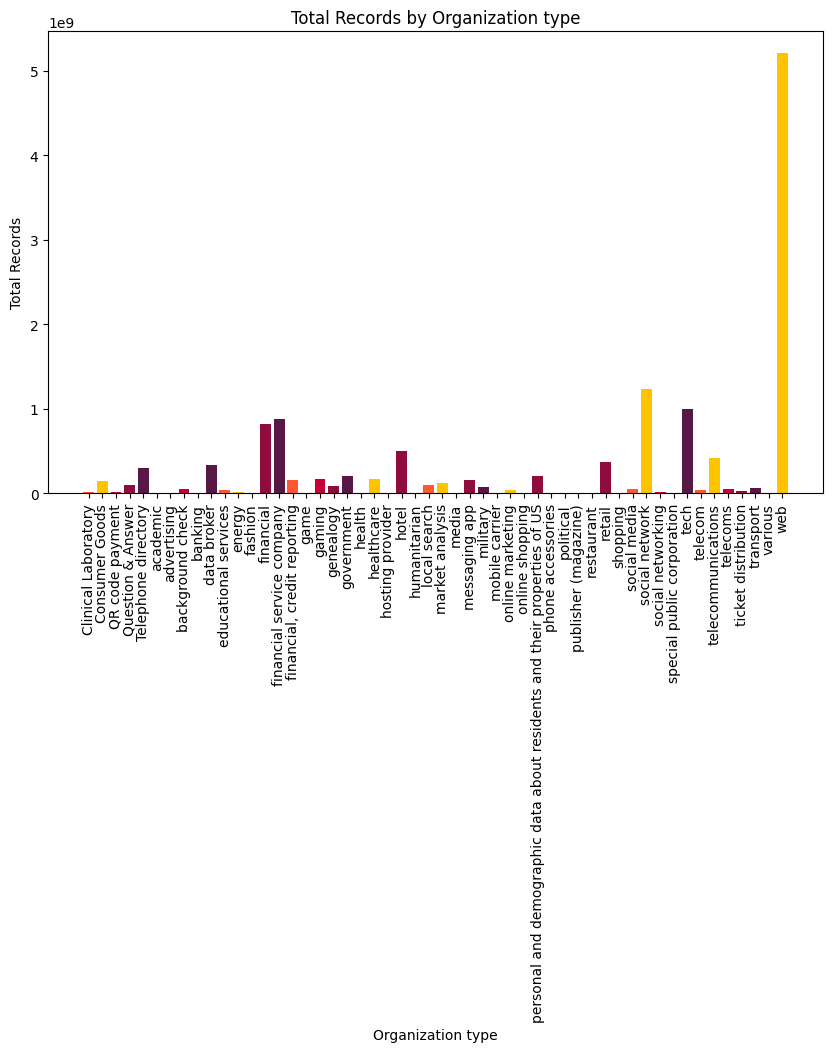

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file

# Group the data by "Organization type" and calculate the sum of "Records" for each type
grouped_data = df.groupby('Organization type')['Records'].sum()

# Create a bar graph with customized colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.bar(grouped_data.index, grouped_data.values, color=['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845'])

# Customize the graph
plt.xlabel('Organization type')
plt.ylabel('Total Records')
plt.title('Total Records by Organization type')
plt.xticks(rotation='vertical')

# Adjust the spacing between the labels
plt.tight_layout()

# Display the graph
plt.show()


**Data Mining**

In [ ]:
df = pd.read_csv('/content/cyber breaches dataset.csv')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
df = pd.read_csv('/content/cyber breaches dataset.csv')

# Drop any rows with missing values
df = df.dropna()

# Separate the features and target variable
X = df.drop('Method', axis=1)
y = df['Method']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
# Instantiate a Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Random Forest Model Accuracy:", rf_accuracy)
print("Random Forest Model Report:")
print(rf_report)


# Model 2: Support Vector Machines (SVM)
# Instantiate an SVM classifier
svm_model = SVC()

# Fit the model using the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("SVM Model Accuracy:", svm_accuracy)
print("SVM Model Report:")
print(svm_report)


Random Forest Model Accuracy: 0.5254237288135594
Random Forest Model Report:
                                                      precision    recall  f1-score   support

                                accidentally exposed       0.00      0.00      0.00         1
                              accidentally published       0.50      0.33      0.40         3
                                              hacked       0.64      0.57      0.60        28
                                  intentionally lost       0.00      0.00      0.00         1
                                                lost       0.68      0.76      0.72        17
                                       poor security       0.10      0.20      0.13         5
publicly accessible Amazon Web Services (AWS) server       0.00      0.00      0.00         0
                                   ransomware hacked       0.00      0.00      0.00         1
                                  social engineering       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.